In [1]:
import numpy as np
import matplotlib.pyplot as plt

# use the scritps created for PCA, k-means and MDC
import myscripts

# for iris plant data 
from sklearn import datasets

In [2]:
# download iris plant data
iris = datasets.load_iris()

# data is the raw dataset and true_indexes the labels
data = iris.data[:,:]
true_indexes = iris.target

# compute the true centroids
true_centroids = myscripts.compute_centroids(data,true_indexes)

In [3]:
# reduce the data dimensionality from 4 to 3 and 2 with PCA
iris3D = myscripts.PCA(data,n_comps=3)
iris2D = myscripts.PCA(data,n_comps=2)

# apply k-means with k=3 to the complete dataset and the two PCA projections
kmeans_obj_c= myscripts.kmeans(data,k=3)
kmeans_obj_3 = myscripts.kmeans(iris3D.projection,k=3)
kmeans_obj_2 = myscripts.kmeans(iris2D.projection,k=3)

# apply mdc using the true centroids to the complete dataset
indexes_mdc = myscripts.MDC(data,true_centroids).indexes


In [11]:
# calculate the accuracy by finding the percentage of points chosen correctly by each classifier
acc_kmeans_c = myscripts.compute_accuracy(true_indexes,true_centroids,kmeans_obj_c.indexes,kmeans_obj_c.centroids)
acc_kmeans_3 = myscripts.compute_accuracy(true_indexes,iris3D.project(true_centroids),kmeans_obj_3.indexes,kmeans_obj_3.centroids)
acc_kmeans_2 = myscripts.compute_accuracy(true_indexes,iris2D.project(true_centroids),kmeans_obj_2.indexes,kmeans_obj_2.centroids)
acc_mdc = myscripts.compute_accuracy(true_indexes,true_centroids,indexes_mdc,true_centroids)
# we used a projection of the true centroids for the 3D and 2D datasets to match in dimension with the centroids obtained by kmeans

# print accuracies
print(f"{round(acc_kmeans_c,2)}% accuracy for K-means for all data.")
print(f"{round(acc_kmeans_3,2)}% accuracy for K-means for 3D data projection.")
print(f"{round(acc_kmeans_2,2)}% accuracy for K-means for 2D data projection.")
print(f"{round(acc_mdc,2)}% accuracy for MDC.")
print()

89.33% accuracy for K-means for all data.
88.0% accuracy for K-means for 3D data projection.
86.0% accuracy for K-means for 2D data projection.
92.67% accuracy for MDC.



In [12]:
# print centroids
print(f"True centroids:\n{true_centroids}\n")
print(f"K-means centroids:\n{kmeans_obj_c.centroids}\n")
print(f"K-means 3D centroids:\n{kmeans_obj_3.centroids}\n")
print(f"K-means 2D centroids:\n{kmeans_obj_2.centroids}\n")


True centroids:
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]

K-means centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]]

K-means 3D centroids:
[[-0.32010457  5.1661465   5.80271145]
 [-2.13061935  4.87623129  3.03574994]
 [-0.07985311  5.86629168  7.37812157]]

K-means 2D centroids:
[[5.86629168 7.37812157]
 [4.8519674  3.11852109]
 [5.20268432 5.86905065]]



c:\Users\tu_rk\Desktop\9no Semestre\ML\ML_Course\IrisPlant\myscripts.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  graf_pt(data[trues])


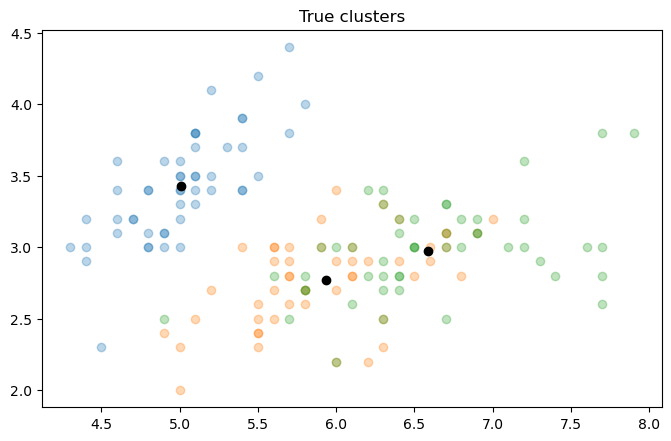

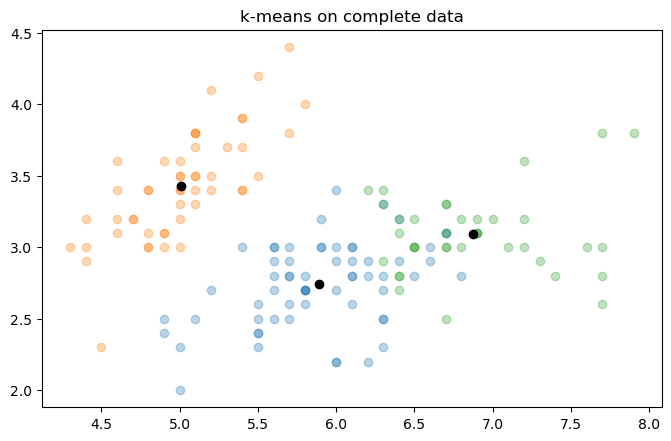

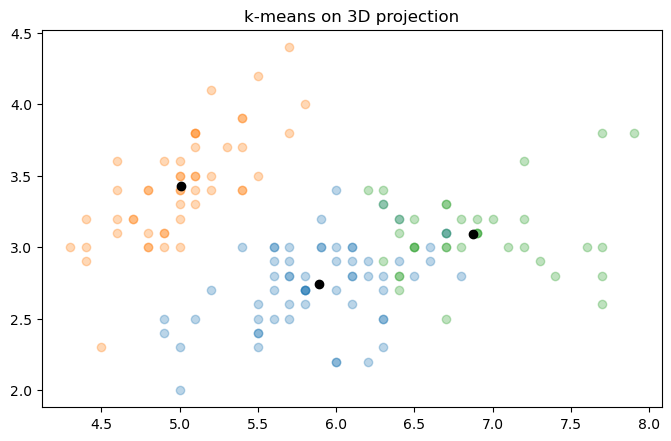

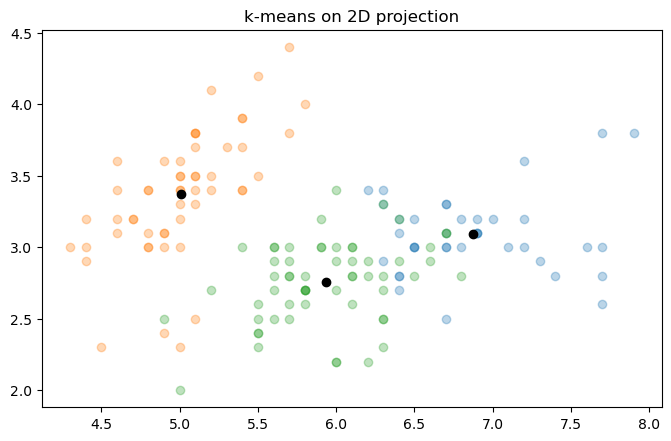

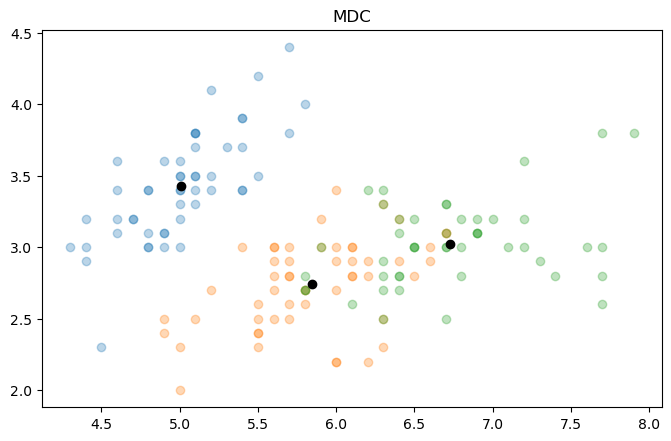

In [5]:
# print 
myscripts.cluster_scatter(data,true_indexes,title="True clusters")
myscripts.cluster_scatter(data,kmeans_obj_3.indexes,title="k-means on complete data")
myscripts.cluster_scatter(data,kmeans_obj_3.indexes,title="k-means on 3D projection")
myscripts.cluster_scatter(data,kmeans_obj_2.indexes,title="k-means on 2D projection")
myscripts.cluster_scatter(data,indexes_mdc,title="MDC")